Problem Statement:
1. A credit card is a small thin plastic or fiber card that incorporates
information about the person such as a picture or signature and the
person’s name on it to charge purchases and services to his linked
account. Charges are debited regularly. Nowadays, card data is read by
ATMs, swiping machines, store readers, banks and online transactions.
2. Each card has a unique card number which is very important. Its security
mainly relies on the physical security of the card and also the privacy of the
credit card number. There is a rapid growth in credit card transactions
which has led to substantial growth in scam cases.
3. Credit card fraud is expanding heavily because fraud financial loss is
increasing drastically. Multiple data mining and statistical techniques are
used to catch fraud. Therefore the detection of fraud using efficient and
secured methods are very important.
T

Load the important libraries and then load the dataset using Pandas module

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Users\sharm\OneDrive\Desktop\Data Science\Python\Python_projects\Credit Card Fraud Detection\creditcard.csv.crdownload")

In [5]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


Perform missing value analysis on the dataset.

In [7]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

From the dataset, calculate the number of genuine transactions, number of fraud transactions and the percentage of fraud transactions.

In [11]:
data['Amount'].describe()

count    11664.000000
mean        62.795132
std        179.816783
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [12]:
genuine = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])
fraud_percentage = (fraud / (fraud + genuine)) * 100

print("Number of Genuine Transactions : ", genuine)
print("Number of Fraud Transactions : ", fraud)
print("Percentage of Fraud Transactions : {:.4f}".format(fraud_percentage))

Number of Genuine Transactions :  11615
Number of Fraud Transactions :  49
Percentage of Fraud Transactions : 0.4201


Using the visualization module, visualize the genuine and fraudulent transactions using a bar graph.

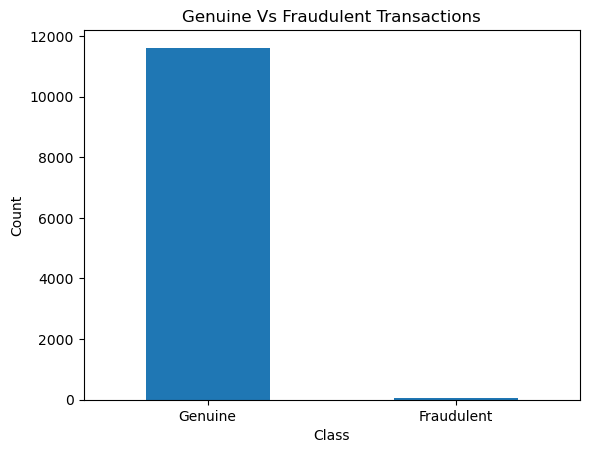

In [14]:
labels = ("Genuine", "Fraudulent")
count_classes = data.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Genuine Vs Fraudulent Transactions")
plt.ylabel('Count')
plt.xticks(range(2), labels)
plt.show()

Using the Standard Scaler module, normalize the amount column and store the new values in the NormalizedAmount column.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
data['Normalized Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Amount', 'Time'], inplace = True, axis = 1)

Split the dataset in train and test set and have a 70:30 split ratio for the model.

In [19]:
X = data.drop(['Class'], axis = 1)
Y = data['Class']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

Now use a decision tree and random forest model for training on top of the train set.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier(n_estimators=100)

Compare the predictions of both models using predict()
Compare the accuracy of both models using score()

Check the performance matrix of both models and compare which model is having the highest performance

In [26]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

Decison Tree

In [28]:
dec_tree.fit(X_train, Y_train)
y_pred_dt = dec_tree.predict(X_test)
decision_tree_score = dec_tree.score(X_test, Y_test) * 100
print("Decision Tree Score : ", decision_tree_score)

Decision Tree Score :  99.85714285714286


In [29]:
def metrics(actual, prediction):
    print("Accuracy Score of Decision tree {:.5f}".format(accuracy_score(actual, prediction)))
    print("Precision Score of Decision tree {:.5f}".format(precision_score(actual, prediction)))
    print("Recall Score of Decision tree {:.5f}".format(recall_score(actual, prediction)))
    print("F1 Score of Decision tree {:.5f}".format(f1_score(actual, prediction)))

In [30]:
metrics(Y_test, y_pred_dt)

Accuracy Score of Decision tree 0.99857
Precision Score of Decision tree 0.82353
Recall Score of Decision tree 0.87500
F1 Score of Decision tree 0.84848


In [31]:
confusion_matrix_dt = confusion_matrix(Y_test, y_pred_dt.round())
print("Confusion Matrix of Decision Tree : ", confusion_matrix_dt)

Confusion Matrix of Decision Tree :  [[3481    3]
 [   2   14]]


Random Forest

In [33]:
rand_forest.fit(X_train, Y_train)
y_pred_rf = rand_forest.predict(X_test)
random_forest_score = rand_forest.score(X_test, Y_test) * 100
print("Random Forest Score : ", random_forest_score)

Random Forest Score :  99.91428571428571


In [34]:
metrics(Y_test, y_pred_rf)

Accuracy Score of Decision tree 0.99914
Precision Score of Decision tree 0.93333
Recall Score of Decision tree 0.87500
F1 Score of Decision tree 0.90323


In [35]:
confusion_matrix_rf = confusion_matrix(Y_test, y_pred_rf.round())
print("Confusion Matrix of Random Forest : ", confusion_matrix_rf)

Confusion Matrix of Random Forest :  [[3483    1]
 [   2   14]]
